# Introduction

Deeds (Digital Electronic Education and Design Suite) (Ponta et al., 1998) is a simulation environment for e-learning in digital electronics. The environment provides learning materials through specialized browsers for the students, and asks them to solve various problems with different levels of difficulty. 

The EPM dataset was collected from University of Genoa by using Deeds, 115 first-year engineering students are required to use Deeds to learn digital electronics which consists of 6 sessions. All the log data of students using Deeds system was collected during the process of learning: activities, time, mouse clicks and key strokes. At the end of each session, students needed to finish an assignment, and the grade of the assignment was recorded in the intermediate grade dataset. In the end of the semester, final exam grades of all students was recorded in the final grades dataset. 

The main purpose of our project is to build a model that can predict whether a student can pass the final exam based on their logs data of laboratory sessions recorded on the Deeds system. By using this model, the instructors can notify those who-may-fail-at-final to help them re-catching the learning schedule.

In [1]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sns.set(style='whitegrid')

%matplotlib inline

# Gathering data

input all seesions data

In [10]:
# read all the session data and save them into a dictionary
sessions = {}
for x in range(1, 7):
    path = './EPM Dataset 2/Data/Processes/Session {0}'.format(x)
    session = glob.glob(os.path.join(path, '*'))
    dataframes = (pd.read_csv(f, names=['session', 'student_Id', 'exercise', 'activity',
                                        'start_time', 'end_time', 'idle_time', 'mouse_wheel', 
                                        'mouse_wheel_click', 'mouse_click_left', 'mouse_click_right', 
                                        'mouse_movement', 'keystroke']) for f in session)
    sessions['session{0}'.format(x)] = pd.concat(dataframes, ignore_index=True, sort=False)

In [11]:
sessions['session1'].head()

,session,student_Id,exercise,activity,start_time,end_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
0,1,1,Es,Other,2.10.2014 11:25:33,2.10.2014 11:25:34,0,0,0,0,0,84,0
1,1,1,Es,Aulaweb,2.10.2014 11:25:35,2.10.2014 11:25:42,218,0,0,4,0,397,0
2,1,1,Es,Blank,2.10.2014 11:25:43,2.10.2014 11:25:43,0,0,0,0,0,59,0
3,1,1,Es,Deeds,2.10.2014 11:25:44,2.10.2014 11:26:17,154117,6,0,8,0,1581,4
4,1,1,Es,Other,2.10.2014 11:26:18,2.10.2014 11:26:18,0,0,0,2,0,103,0


In [12]:
sessions['session2'].head()

,session,student_Id,exercise,activity,start_time,end_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
0,2,1,Es,Study_Es_2_1,16.10.2014 11:25:9,16.10.2014 11:25:10,0,0,0,0,0,0,0
1,2,1,Es_2_1,Study_Es_2_1,16.10.2014 11:25:10,16.10.2014 11:25:11,62,0,0,2,0,176,0
2,2,1,Es_2_1,Deeds_Es_2_1,16.10.2014 11:25:12,16.10.2014 11:25:15,344,0,0,4,0,276,0
3,2,1,Es_2_1,Study_Es_2_1,16.10.2014 11:25:16,16.10.2014 11:25:47,143691,7,0,2,0,898,0
4,2,1,Es_2_1,TextEditor_Es_2_1,16.10.2014 11:25:49,16.10.2014 11:25:54,127,0,0,5,0,472,0


In [14]:
sessions['session6'].tail()

,session,student_Id,exercise,activity,start_time,end_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
53165,6,99,Es_6_3,Aulaweb,11.12.2014 13:47:30,11.12.2014 13:47:35,60,30,0,1,0,250,0
53166,6,99,Es_6_3,Other,11.12.2014 13:47:36,11.12.2014 13:47:36,0,0,0,3,0,37,0
53167,6,99,Es_6_3,Other,11.12.2014 13:47:37,11.12.2014 13:47:39,64,0,0,2,2,283,0
53168,6,99,Es_6_3,FSM_Es_6_3,11.12.2014 13:47:40,11.12.2014 13:47:40,0,0,0,2,0,67,0
53169,6,99,Es_6_3,Properties,11.12.2014 13:47:41,11.12.2014 13:47:41,0,0,0,2,0,103,0


In [28]:
logs = pd.read_csv('./EPM Dataset 2/Data/logs.txt', sep='\t')

In [29]:
logs.head()

,Student Id,Session 1,Session 2,Session 3,Session 4,Session 5,Session 6
0,1,1,1,0,1,1,1
1,2,1,1,1,1,1,1
2,3,0,1,1,1,1,0
3,4,1,1,1,1,1,1
4,5,1,1,1,1,1,1


final grades data

In [17]:
final_grades_1st = pd.read_excel('./EPM Dataset 2/Data/final_grades.xlsx', sheet_name='Exam (First time)')
final_grades_2nd = pd.read_excel('./EPM Dataset 2/Data/final_grades.xlsx', sheet_name='Exam (Second time)')

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [19]:
final_grades_1st.head()

,Student ID,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),TOTAL\n(100 points)
0,3,2.0,3,1.0,2.0,1,2,2,2.0,3.0,15.0,10.0,1,5.0,3.0,18.0,15,85.0
1,6,2.0,3,2.0,3.0,1,2,2,0.0,3.0,15.0,7.0,2,9.0,3.0,13.0,15,82.0
2,7,2.0,3,1.0,1.5,1,2,0,0.0,3.0,5.0,4.0,0,0.0,3.0,17.0,10,52.5
3,10,2.0,3,2.0,1.5,1,2,0,2.0,3.0,11.0,1.0,2,10.0,1.5,7.0,10,59.0
4,13,2.0,3,2.0,1.5,1,2,2,2.0,3.0,14.5,10.0,2,2.0,3.0,25.0,15,90.0


In [21]:
final_grades_2nd.head()

,Student ID,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),TOTAL\n(100 points)
0,1,2.0,3.0,1.0,0.5,1.0,2,2.0,2,3,15,10.0,2.0,10.0,3.0,25.0,13.0,94.5
1,2,2.0,3.0,2.0,0.5,1.0,2,0.0,2,3,15,2.0,0.0,5.0,1.5,5.0,0.0,44.0
2,4,2.0,3.0,1.0,0.5,1.0,2,0.0,2,0,3,4.0,0.0,1.5,0.0,5.0,5.0,30.0
3,5,2.0,3.0,2.0,1.5,1.0,2,2.0,2,3,3,2.0,1.5,9.0,1.5,2.0,1.0,38.5
4,7,2.0,3.0,1.0,1.5,1.0,2,2.0,2,3,15,10.0,1.0,2.5,0.0,20.0,12.0,78.0


Intermediate grades data:

In [24]:
inter_grades = pd.read_excel('./EPM Dataset 2/Data/intermediate_grades.xlsx')

In [25]:
inter_grades.head()

,Student Id,Session 2,Session 3,Session 4,Session 5,Session 6
0,1,5.0,0.0,4.5,4.0,2.25
1,2,4.0,3.5,4.5,4.0,1.00
2,3,3.5,3.5,4.5,4.0,0.00
3,4,6.0,4.0,5.0,3.5,2.75
4,5,5.0,4.0,5.0,4.0,2.75


# Accessing Data

There are some 0 scores in the intermediate grades dataset, and we know that the logs dataset marked all the student has log in a session with value 1, while those has not log in a session with value 0, so here comes the question: were all the students without log got a 0 score in the intermediate grades?

We can use the test below to check this question:

In [26]:
no_inter_grades = (inter_grades == 0)
no_inter_grades

,Student Id,Session 2,Session 3,Session 4,Session 5,Session 6
0,False,False,True,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,True
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
110,False,False,True,True,False,True
111,False,True,True,True,True,True
112,False,True,True,True,True,True
113,False,True,True,True,True,True


In [30]:
no_log = (logs == 0)
no_log

,Student Id,Session 1,Session 2,Session 3,Session 4,Session 5,Session 6
0,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
110,False,False,True,True,True,True,True
111,False,False,True,True,True,True,True
112,False,False,True,True,True,True,True
113,False,False,True,True,True,True,True


In [38]:
no_log.drop('Session 1', axis=1, inplace=True)
no_log

,Student Id,Session 2,Session 3,Session 4,Session 5,Session 6
0,False,False,True,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,True
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
110,False,True,True,True,True,True
111,False,True,True,True,True,True
112,False,True,True,True,True,True
113,False,True,True,True,True,True


In [39]:
no_grade_contrast = (no_log != no_inter_grades)

In [43]:
no_grade_contrast.loc[no_grade_contrast['Session 2'] == True]

,Student Id,Session 2,Session 3,Session 4,Session 5,Session 6
26,False,True,False,False,False,False
34,False,True,False,False,False,False
54,False,True,False,False,False,True
59,False,True,True,False,False,False
60,False,True,False,False,False,False
65,False,True,False,False,False,False
67,False,True,False,False,False,False
88,False,True,False,False,False,False
106,False,True,False,False,False,False
110,False,True,False,False,True,False


All those True values means that not all the no log students get a zero score in intermediate grades. We can dig into those student Id to have a look of it.

In [44]:
se2_index = no_grade_contrast.loc[no_grade_contrast['Session 2'] == True].index

In [45]:
inter_grades.iloc[se2_index]

,Student Id,Session 2,Session 3,Session 4,Session 5,Session 6
26,27,0.0,3.0,4.5,4.0,1.75
34,35,0.5,0.5,3.5,3.5,1.50
54,55,2.0,3.5,4.5,4.0,2.50
59,60,2.0,0.5,4.0,3.5,1.00
60,61,0.0,1.0,4.5,3.5,1.50
65,66,0.0,2.0,4.5,3.0,2.25
67,68,5.5,3.5,5.0,4.0,3.00
88,89,0.5,1.5,3.5,2.5,0.50
106,107,0.0,1.0,0.0,0.0,0.00
110,111,3.0,0.0,0.0,3.0,0.00


In [46]:
logs.iloc[se2_index]

,Student Id,Session 1,Session 2,Session 3,Session 4,Session 5,Session 6
26,27,0,1,1,1,1,1
34,35,0,0,1,1,1,1
54,55,1,0,1,1,1,0
59,60,0,0,0,1,1,1
60,61,0,1,1,1,1,1
65,66,1,1,1,1,1,1
67,68,1,0,1,1,1,1
88,89,0,0,1,1,1,1
106,107,0,1,1,0,0,0
110,111,1,0,0,0,0,0


It is quite strange that student id 27 has log in session 2 but get a 0 score, while student id 35 has no log in session 2 but get a 0.5 score. 

If one of the students did not log in a session then that student would get a 0 score in the assignment of that session because that student did not even log into that session, he or she cannot finish the exercise in that DEEDS session. 

But the data breaks our hypothesis, we should now assume that assignments are independent from the Deeds system.

**So we thought to use only those students that attended all the 6 sessions and rely on the final exam grades for correct evaluation of the students learning, as for intermediate grades, they could still obtain it if they copied the solution of each other, or did a group work.**

To check how many observations we have with respect to Deeds sessions attendance rate:

In [47]:
logs.iloc[:, 1:].sum(axis=1).value_counts()

6    49
5    22
4    15
1    13
3    11
2     5
dtype: int64

In [48]:
logs.loc[logs.iloc[:, 1:].sum(axis=1) == 6]

,Student Id,Session 1,Session 2,Session 3,Session 4,Session 5,Session 6
1,2,1,1,1,1,1,1
3,4,1,1,1,1,1,1
4,5,1,1,1,1,1,1
6,7,1,1,1,1,1,1
9,10,1,1,1,1,1,1
10,11,1,1,1,1,1,1
11,12,1,1,1,1,1,1
13,14,1,1,1,1,1,1
14,15,1,1,1,1,1,1
16,17,1,1,1,1,1,1


**To make prediction based on students performance in Deeds session, we decided to choose those students who attended all 6 sessions so that we can keep 49 observations.**

The final grades has 2 datasets: first exam and second exam, some student attend both exams, and the detail of both exams are different but addressed the same concepts. We can check who attended both exams:

In [49]:
attend_1st_id = np.asarray(final_grades_1st['Student ID'])
attend_2nd_id = np.asarray(final_grades_2nd['Student ID'])

In [50]:
def common_member(a, b):
    a_set = set(a)
    b_set = set(b)
    if (a_set & b_set):
        print(a_set & b_set)
    else:
        print('No common elements')

In [51]:
attend_both = common_member(attend_1st_id, attend_2nd_id)

{7, 20, 24, 30, 37, 39, 44, 46, 51, 56, 59, 62, 67, 68, 73, 83, 87, 92, 99, 101, 106}


**To solve this discrepancy, we decided to use the mean of two final grades as the final grades of those students.**

# Cleaning Data

## Clean Intermediate and final grades datasets

As mentioned in the accessing data part, we decided to clean final and intermediate datasets based on two points:

* **To make prediction based on students performance in Deeds session we decided to choose those students who attended all 6 sessions.**
* **Use the mean of the two final grades as the final grades of those students who took the final twice.**

Firstly, we keep the students who attended in all 6 sessions:

In [52]:
ID_list = logs.loc[logs.iloc[:, 1:].sum(axis=1) == 6]
ID_list.head()

,Student Id,Session 1,Session 2,Session 3,Session 4,Session 5,Session 6
1,2,1,1,1,1,1,1
3,4,1,1,1,1,1,1
4,5,1,1,1,1,1,1
6,7,1,1,1,1,1,1
9,10,1,1,1,1,1,1


In [53]:
ID_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1 to 97
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Student Id  49 non-null     int64
 1   Session 1   49 non-null     int64
 2   Session 2   49 non-null     int64
 3   Session 3   49 non-null     int64
 4   Session 4   49 non-null     int64
 5   Session 5   49 non-null     int64
 6   Session 6   49 non-null     int64
dtypes: int64(7)
memory usage: 3.1 KB


In [54]:
final = final_grades_1st.append(final_grades_2nd)
final.sort_values(by=['Student ID']).head()

,Student ID,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),TOTAL\n(100 points)
0,1,2.0,3.0,1.0,0.5,1.0,2,2.0,2.0,3.0,15.0,10.0,2.0,10.0,3.0,25.0,13.0,94.5
1,2,2.0,3.0,2.0,0.5,1.0,2,0.0,2.0,3.0,15.0,2.0,0.0,5.0,1.5,5.0,0.0,44.0
0,3,2.0,3.0,1.0,2.0,1.0,2,2.0,2.0,3.0,15.0,10.0,1.0,5.0,3.0,18.0,15.0,85.0
2,4,2.0,3.0,1.0,0.5,1.0,2,0.0,2.0,0.0,3.0,4.0,0.0,1.5,0.0,5.0,5.0,30.0
3,5,2.0,3.0,2.0,1.5,1.0,2,2.0,2.0,3.0,3.0,2.0,1.5,9.0,1.5,2.0,1.0,38.5


In [55]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 61
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student ID          114 non-null    int64  
 1   ES 1.1 
(2 points)  114 non-null    float64
 2   ES 1.2 
(3 points)  114 non-null    float64
 3   ES 2.1
(2 points)   114 non-null    float64
 4   ES 2.2
(3 points)   114 non-null    float64
 5   ES 3.1
(1 points)   114 non-null    float64
 6   ES 3.2
(2 points)   114 non-null    int64  
 7   ES 3.3
(2 points)   114 non-null    float64
 8   ES 3.4
(2 points)   114 non-null    float64
 9   ES 3.5
(3 points)   114 non-null    float64
 10  ES 4.1
(15 points)  114 non-null    float64
 11  ES 4.2
(10 points)  114 non-null    float64
 12  ES 5.1
(2 points)   114 non-null    float64
 13  ES 5.2
(10 points)  114 non-null    float64
 14  ES 5.3
(3 points)   114 non-null    float64
 15  ES 6.1
(25 points)  114 non-null    float64
 16  ES 6.2
(1

Calculate the mean of the final grades for those students who took the exam twice:

In [56]:
dup_rows = final[final['Student ID'].duplicated(keep=False)]

In [57]:
final.drop(dup_rows.index, axis=0, inplace=True)

In [58]:
avg_grades = dup_rows.groupby('Student ID').mean()
avg_grades.insert(0, column='Student ID', value=avg_grades.index)

In [59]:
final = final.append(avg_grades).sort_values(by=['Student ID'])

Subset with only those students who attended in all 6 sessions:

In [61]:
final = final[final['Student ID'].isin(ID_list['Student Id'])]
final

,Student ID,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),TOTAL\n(100 points)
1,2,2.00,3.0,2.00,0.50,1.0,2,0.0,2.0,3.00,15.00,2.0,0.0,5.00,1.50,5.00,0.00,44.00
3,5,2.00,3.0,2.00,1.50,1.0,2,2.0,2.0,3.00,3.00,2.0,1.5,9.00,1.50,2.00,1.00,38.50
7,7,2.00,3.0,1.00,1.50,1.0,2,1.0,1.0,3.00,10.00,7.0,0.5,1.25,1.50,18.50,11.00,65.25
3,10,2.00,3.0,2.00,1.50,1.0,2,0.0,2.0,3.00,11.00,1.0,2.0,10.00,1.50,7.00,10.00,59.00
7,11,2.00,3.0,1.00,0.50,1.0,2,2.0,2.0,3.00,12.00,3.0,2.0,8.00,1.50,12.00,5.00,60.00
8,12,2.00,3.0,0.50,2.00,1.0,2,0.0,2.0,3.00,15.00,2.0,0.5,5.50,2.00,0.00,0.00,40.50
5,15,2.00,3.0,1.00,2.00,1.0,2,2.0,2.0,3.00,15.00,10.0,2.0,4.00,1.50,2.00,15.00,67.50
7,17,2.00,3.0,1.00,2.00,1.0,2,2.0,2.0,3.00,15.00,10.0,2.0,10.00,3.00,24.00,15.00,97.00
20,20,2.00,3.0,2.00,1.50,1.0,2,2.0,2.0,2.25,15.00,10.0,1.0,4.00,3.00,15.00,12.25,78.00
12,28,2.00,3.0,1.00,2.00,1.0,2,2.0,2.0,0.00,15.00,8.5,2.0,4.00,3.00,19.00,13.00,79.50


In [62]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 1 to 47
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student ID          34 non-null     int64  
 1   ES 1.1 
(2 points)  34 non-null     float64
 2   ES 1.2 
(3 points)  34 non-null     float64
 3   ES 2.1
(2 points)   34 non-null     float64
 4   ES 2.2
(3 points)   34 non-null     float64
 5   ES 3.1
(1 points)   34 non-null     float64
 6   ES 3.2
(2 points)   34 non-null     int64  
 7   ES 3.3
(2 points)   34 non-null     float64
 8   ES 3.4
(2 points)   34 non-null     float64
 9   ES 3.5
(3 points)   34 non-null     float64
 10  ES 4.1
(15 points)  34 non-null     float64
 11  ES 4.2
(10 points)  34 non-null     float64
 12  ES 5.1
(2 points)   34 non-null     float64
 13  ES 5.2
(10 points)  34 non-null     float64
 14  ES 5.3
(3 points)   34 non-null     float64
 15  ES 6.1
(25 points)  34 non-null     float64
 16  ES 6.2
(15

Since not all the students participated in the final exams, now we have 34 observations left.

Create a pass or fail indicator for the final grades:

In [63]:
df = final.copy()

In [64]:
df['pass_IND'] = (df['TOTAL\n(100 points)'] >= 60).astype(int)

In [65]:
df

,Student ID,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),TOTAL\n(100 points),pass_IND
1,2,2.00,3.0,2.00,0.50,1.0,2,0.0,2.0,3.00,15.00,2.0,0.0,5.00,1.50,5.00,0.00,44.00,0
3,5,2.00,3.0,2.00,1.50,1.0,2,2.0,2.0,3.00,3.00,2.0,1.5,9.00,1.50,2.00,1.00,38.50,0
7,7,2.00,3.0,1.00,1.50,1.0,2,1.0,1.0,3.00,10.00,7.0,0.5,1.25,1.50,18.50,11.00,65.25,1
3,10,2.00,3.0,2.00,1.50,1.0,2,0.0,2.0,3.00,11.00,1.0,2.0,10.00,1.50,7.00,10.00,59.00,0
7,11,2.00,3.0,1.00,0.50,1.0,2,2.0,2.0,3.00,12.00,3.0,2.0,8.00,1.50,12.00,5.00,60.00,1
8,12,2.00,3.0,0.50,2.00,1.0,2,0.0,2.0,3.00,15.00,2.0,0.5,5.50,2.00,0.00,0.00,40.50,0
5,15,2.00,3.0,1.00,2.00,1.0,2,2.0,2.0,3.00,15.00,10.0,2.0,4.00,1.50,2.00,15.00,67.50,1
7,17,2.00,3.0,1.00,2.00,1.0,2,2.0,2.0,3.00,15.00,10.0,2.0,10.00,3.00,24.00,15.00,97.00,1
20,20,2.00,3.0,2.00,1.50,1.0,2,2.0,2.0,2.25,15.00,10.0,1.0,4.00,3.00,15.00,12.25,78.00,1
12,28,2.00,3.0,1.00,2.00,1.0,2,2.0,2.0,0.00,15.00,8.5,2.0,4.00,3.00,19.00,13.00,79.50,1


Now, we combine the intermediate grades data with final grades for exploratory data analysis and model building:

In [66]:
inter_grades.head()

,Student Id,Session 2,Session 3,Session 4,Session 5,Session 6
0,1,5.0,0.0,4.5,4.0,2.25
1,2,4.0,3.5,4.5,4.0,1.00
2,3,3.5,3.5,4.5,4.0,0.00
3,4,6.0,4.0,5.0,3.5,2.75
4,5,5.0,4.0,5.0,4.0,2.75


In [67]:
df = pd.merge(inter_grades, df, how="inner", left_on="Student Id", right_on="Student ID")

# drop the duplicated column
df.drop(['Student ID'], axis=1, inplace=True)

# rename columns
df.rename(columns={"Student Id": 'ID', "TOTAL\n(100 points)": 'total'}, inplace=True)

pd.set_option('max_columns', 80)
df.head()

,ID,Session 2,Session 3,Session 4,Session 5,Session 6,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),total,pass_IND
0,2,4.0,3.5,4.5,4.0,1.00,2.0,3.0,2.0,0.5,1.0,2,0.0,2.0,3.0,15.0,2.0,0.0,5.00,1.5,5.0,0.0,44.00,0
1,5,5.0,4.0,5.0,4.0,2.75,2.0,3.0,2.0,1.5,1.0,2,2.0,2.0,3.0,3.0,2.0,1.5,9.00,1.5,2.0,1.0,38.50,0
2,7,4.0,4.0,4.5,4.0,2.00,2.0,3.0,1.0,1.5,1.0,2,1.0,1.0,3.0,10.0,7.0,0.5,1.25,1.5,18.5,11.0,65.25,1
3,10,5.0,4.0,4.5,4.0,3.00,2.0,3.0,2.0,1.5,1.0,2,0.0,2.0,3.0,11.0,1.0,2.0,10.00,1.5,7.0,10.0,59.00,0
4,11,4.0,2.0,5.0,4.0,1.50,2.0,3.0,1.0,0.5,1.0,2,2.0,2.0,3.0,12.0,3.0,2.0,8.00,1.5,12.0,5.0,60.00,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  34 non-null     int64  
 1   Session 2           34 non-null     float64
 2   Session 3           34 non-null     float64
 3   Session 4           34 non-null     float64
 4   Session 5           34 non-null     float64
 5   Session 6           34 non-null     float64
 6   ES 1.1 
(2 points)  34 non-null     float64
 7   ES 1.2 
(3 points)  34 non-null     float64
 8   ES 2.1
(2 points)   34 non-null     float64
 9   ES 2.2
(3 points)   34 non-null     float64
 10  ES 3.1
(1 points)   34 non-null     float64
 11  ES 3.2
(2 points)   34 non-null     int64  
 12  ES 3.3
(2 points)   34 non-null     float64
 13  ES 3.4
(2 points)   34 non-null     float64
 14  ES 3.5
(3 points)   34 non-null     float64
 15  ES 4.1
(15 points)  34 non-null     float64
 16  ES 4.2
(10

# Clean log Data

Clean the logs data and aggregate them to behavior data:

In [69]:
behavior = pd.DataFrame()
for i in range(1, 7):
    behavior = behavior.append(sessions['session{0}'.format(i)])

In [70]:
behavior.head()

,session,student_Id,exercise,activity,start_time,end_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
0,1,1,Es,Other,2.10.2014 11:25:33,2.10.2014 11:25:34,0,0,0,0,0,84,0
1,1,1,Es,Aulaweb,2.10.2014 11:25:35,2.10.2014 11:25:42,218,0,0,4,0,397,0
2,1,1,Es,Blank,2.10.2014 11:25:43,2.10.2014 11:25:43,0,0,0,0,0,59,0
3,1,1,Es,Deeds,2.10.2014 11:25:44,2.10.2014 11:26:17,154117,6,0,8,0,1581,4
4,1,1,Es,Other,2.10.2014 11:26:18,2.10.2014 11:26:18,0,0,0,2,0,103,0


In [71]:
behavior.tail()

,session,student_Id,exercise,activity,start_time,end_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
53165,6,99,Es_6_3,Aulaweb,11.12.2014 13:47:30,11.12.2014 13:47:35,60,30,0,1,0,250,0
53166,6,99,Es_6_3,Other,11.12.2014 13:47:36,11.12.2014 13:47:36,0,0,0,3,0,37,0
53167,6,99,Es_6_3,Other,11.12.2014 13:47:37,11.12.2014 13:47:39,64,0,0,2,2,283,0
53168,6,99,Es_6_3,FSM_Es_6_3,11.12.2014 13:47:40,11.12.2014 13:47:40,0,0,0,2,0,67,0
53169,6,99,Es_6_3,Properties,11.12.2014 13:47:41,11.12.2014 13:47:41,0,0,0,2,0,103,0


In [72]:
behavior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230318 entries, 0 to 53169
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   session            230318 non-null  int64 
 1   student_Id         230318 non-null  int64 
 2   exercise           230318 non-null  object
 3   activity           230318 non-null  object
 4   start_time         230318 non-null  object
 5   end_time           230318 non-null  object
 6   idle_time          230318 non-null  int64 
 7   mouse_wheel        230318 non-null  int64 
 8   mouse_wheel_click  230318 non-null  int64 
 9   mouse_click_left   230318 non-null  int64 
 10  mouse_click_right  230318 non-null  int64 
 11  mouse_movement     230318 non-null  int64 
 12  keystroke          230318 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 24.6+ MB


In [73]:
behavior.describe()

,session,student_Id,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
count,230318.000000,230318.000000,2.303180e+05,230318.000000,230318.000000,230318.000000,230318.000000,230318.000000,230318.000000
mean,3.694779,53.626903,-1.847882e+09,2.743854,0.005445,7.068774,0.336109,414.532755,6.279835
std,1.770124,31.542431,4.497414e+11,27.139552,0.223367,21.545819,3.017604,1272.397451,50.960664
min,1.000000,1.000000,-2.059092e+14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,27.000000,0.000000e+00,0.000000,0.000000,2.000000,0.000000,62.000000,0.000000
50%,4.000000,53.000000,8.000000e+01,0.000000,0.000000,2.000000,0.000000,138.000000,0.000000
75%,5.000000,81.000000,5.749750e+03,0.000000,0.000000,5.000000,0.000000,335.000000,0.000000
max,6.000000,115.000000,7.244736e+09,2904.000000,60.000000,1096.000000,168.000000,85949.000000,4754.000000


Check duplicate values:

In [74]:
behavior.duplicated().sum()

0

We can try to aggregate the logs data to behavior data of each session per students:

Firstly, we need to convert the start and end time to work time:

In [75]:
from datetime import timedelta

In [78]:
behavior['work_time'] = (pd.to_datetime(behavior['end_time']) - \
                         pd.to_datetime(behavior['start_time'])).dt.total_seconds()

In [77]:
behavior.head()

,session,student_Id,exercise,activity,start_time,end_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke,work_time
0,1,1,Es,Other,2.10.2014 11:25:33,2.10.2014 11:25:34,0,0,0,0,0,84,0,1.0
1,1,1,Es,Aulaweb,2.10.2014 11:25:35,2.10.2014 11:25:42,218,0,0,4,0,397,0,7.0
2,1,1,Es,Blank,2.10.2014 11:25:43,2.10.2014 11:25:43,0,0,0,0,0,59,0,0.0
3,1,1,Es,Deeds,2.10.2014 11:25:44,2.10.2014 11:26:17,154117,6,0,8,0,1581,4,33.0
4,1,1,Es,Other,2.10.2014 11:26:18,2.10.2014 11:26:18,0,0,0,2,0,103,0,0.0


However, we cannot just use all the logs to aggregate for data that can shows how the student learned during the sessions. It is because the Deeds system record all the activities, and some of them are not related to studying.

In [79]:
behavior.activity.value_counts()

 Other                33602
 Blank                24303
 Diagram              20815
 Properties           19677
 Aulaweb               8261
                      ...  
 Study_Es_6_6            34
 Study_Es_6_5            33
 Fsm_Related             25
 TextEditor_Es_6_5        4
 TextEditor_Es_6_6        3
Name: activity, Length: 99, dtype: int64

In fact, there are some noise in those activities: 
* Other 
* Blank

We need to filter them out to get the clean data related to studying:

In [80]:
# reset index to remove duplicated index
behavior = behavior.reset_index(drop=True)

In [81]:
behavior.tail()

,session,student_Id,exercise,activity,start_time,end_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke,work_time
230313,6,99,Es_6_3,Aulaweb,11.12.2014 13:47:30,11.12.2014 13:47:35,60,30,0,1,0,250,0,5.0
230314,6,99,Es_6_3,Other,11.12.2014 13:47:36,11.12.2014 13:47:36,0,0,0,3,0,37,0,0.0
230315,6,99,Es_6_3,Other,11.12.2014 13:47:37,11.12.2014 13:47:39,64,0,0,2,2,283,0,2.0
230316,6,99,Es_6_3,FSM_Es_6_3,11.12.2014 13:47:40,11.12.2014 13:47:40,0,0,0,2,0,67,0,0.0
230317,6,99,Es_6_3,Properties,11.12.2014 13:47:41,11.12.2014 13:47:41,0,0,0,2,0,103,0,0.0


In [82]:
noise_index = behavior.loc[behavior.activity.str.contains('Other|Blank', regex=True)].index

In [84]:
behavior.drop(index=noise_index, inplace=True)

In [85]:
behavior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172413 entries, 1 to 230317
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   session            172413 non-null  int64  
 1   student_Id         172413 non-null  int64  
 2   exercise           172413 non-null  object 
 3   activity           172413 non-null  object 
 4   start_time         172413 non-null  object 
 5   end_time           172413 non-null  object 
 6   idle_time          172413 non-null  int64  
 7   mouse_wheel        172413 non-null  int64  
 8   mouse_wheel_click  172413 non-null  int64  
 9   mouse_click_left   172413 non-null  int64  
 10  mouse_click_right  172413 non-null  int64  
 11  mouse_movement     172413 non-null  int64  
 12  keystroke          172413 non-null  int64  
 13  work_time          172413 non-null  float64
dtypes: float64(1), int64(9), object(4)
memory usage: 19.7+ MB


Since we only need those students attended all sessions and final exam, we can filter behavior dataset based on students ID:

In [86]:
behavior = behavior.loc[behavior['student_Id'].isin(df.ID)]
behavior = behavior.reset_index(drop=True)

In [87]:
behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67974 entries, 0 to 67973
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   session            67974 non-null  int64  
 1   student_Id         67974 non-null  int64  
 2   exercise           67974 non-null  object 
 3   activity           67974 non-null  object 
 4   start_time         67974 non-null  object 
 5   end_time           67974 non-null  object 
 6   idle_time          67974 non-null  int64  
 7   mouse_wheel        67974 non-null  int64  
 8   mouse_wheel_click  67974 non-null  int64  
 9   mouse_click_left   67974 non-null  int64  
 10  mouse_click_right  67974 non-null  int64  
 11  mouse_movement     67974 non-null  int64  
 12  keystroke          67974 non-null  int64  
 13  work_time          67974 non-null  float64
dtypes: float64(1), int64(9), object(4)
memory usage: 7.3+ MB


Check if the filtering is successful:

In [88]:
behavior.student_Id.value_counts().size

34

Aggregate behavior data per student per session:

In [89]:
behavior.head()

,session,student_Id,exercise,activity,start_time,end_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke,work_time
0,1,10,Es_1_1,Deeds_Es_1_1,2.10.2014 11:30:23,2.10.2014 11:41:31,101934624,0,0,186,44,12954,0,668.0
1,1,10,Es_1_1,Deeds_Es_1_1,2.10.2014 11:41:33,2.10.2014 11:41:54,177214,0,0,6,0,562,0,21.0
2,1,10,Es_1_1,Deeds_Es_1_1,2.10.2014 11:44:10,2.10.2014 11:44:11,0,0,0,2,0,200,0,1.0
3,1,10,Es_1_1,Deeds_Es_1_1,2.10.2014 11:44:20,2.10.2014 11:44:20,0,0,0,2,0,92,0,0.0
4,1,10,Es_1_1,TextEditor,2.10.2014 11:44:21,2.10.2014 11:44:21,0,0,0,0,0,16,0,0.0


In [90]:
sum_behv = behavior.groupby(['student_Id', 'session'], as_index=False).\
           agg({'work_time':'sum', 'idle_time': 'sum', 'mouse_wheel': 'sum', \
                'mouse_wheel_click': 'sum', 'mouse_click_left': 'sum', \
                'mouse_click_right': 'sum', 'mouse_movement': 'sum', 'keystroke': 'sum'})

In [91]:
sum_behv.head()

,student_Id,session,work_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
0,2,1,4215.0,182639719,0,0,2,0,45,1047
1,2,2,8500.0,515932761,0,0,3696,98,69226,5151
2,2,3,9741.0,627184936,1379,0,5543,304,259130,4873
3,2,4,4095.0,105605812,826,0,1857,82,91633,2232
4,2,5,5128.0,117091342,1570,0,2211,164,122581,3142


Idle time in the dataset description is the duration of idle time between the start and end time of an activity in milliseconds. However, in reality, it is even bigger than the total work time between start time and end time, we think that is a data quality problem. 

Besides, even if the idle time is accurate, it only tells us the during that time a student did not touch the mouse and keyboard, we cannot say this time is of thinking time or not related to studying.

So, for reliability, we decided to remove this column from the behavior data.

In [92]:
sum_behv.drop(columns=['idle_time'], inplace=True)

In [93]:
sum_behv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   student_Id         204 non-null    int64  
 1   session            204 non-null    int64  
 2   work_time          204 non-null    float64
 3   mouse_wheel        204 non-null    int64  
 4   mouse_wheel_click  204 non-null    int64  
 5   mouse_click_left   204 non-null    int64  
 6   mouse_click_right  204 non-null    int64  
 7   mouse_movement     204 non-null    int64  
 8   keystroke          204 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 15.9 KB


In [94]:
sum_behv.head()

,student_Id,session,work_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
0,2,1,4215.0,0,0,2,0,45,1047
1,2,2,8500.0,0,0,3696,98,69226,5151
2,2,3,9741.0,1379,0,5543,304,259130,4873
3,2,4,4095.0,826,0,1857,82,91633,2232
4,2,5,5128.0,1570,0,2211,164,122581,3142


Transform the dataset from long to wide so that a row contains all behavior data of a student:

In [95]:
behv = sum_behv.pivot(index='student_Id', columns='session', 
                      values=['work_time', 'mouse_wheel', 'mouse_wheel_click', 'mouse_click_left', 
                              'mouse_click_right', 'mouse_movement', 'keystroke'])
behv.head()

work_time                                         mouse_wheel  \
session            1       2       3       4       5       6           1   
student_Id                                                                 
2             4215.0  8500.0  9741.0  4095.0  5128.0  5706.0         0.0   
5             4071.0  7754.0  8489.0  3252.0  5037.0  9027.0       586.0   
7             5086.0  7975.0  9421.0  4893.0  3465.0  8999.0         0.0   
10            4660.0  7736.0  8413.0  4976.0  5269.0  8151.0       573.0   
11            4908.0  8785.0  9968.0  2459.0  3959.0  9095.0       312.0   

                                                  mouse_wheel_click            \
session          2       3      4       5       6                 1    2    3   
student_Id                                                                      
2              0.0  1379.0  826.0  1570.0   708.0               0.0  0.0  0.0   
5           1538.0  2069.0  489.0  1138.0   904.0               0.0  0.0  0.0   
7           2145.0   728.0  342.0  1088.0   968.0              18.0  0.0  0.0   
10          1305.0   517.0  957.0  2577.0  1131.0               0.0  0.0  4.0   
11          1153.0   153.0  539.0   888.0   493.0               0.0  0.0  0.0   

                          mouse_click_left                                  \
session       4    5    6                1       2       3       4       5   
student_Id                                                                   
2           0.0  0.0  0.0              2.0  3696.0  5543.0  1857.0  2211.0   
5           0.0  0.0  0.0           1977.0  4303.0  2703.0  1419.0  1924.0   
7           0.0  2.0  0.0           2238.0  2733.0  3761.0  1068.0  1088.0   
10          0.0  0.0  0.0           2244.0  3830.0  4709.0  5112.0  3855.0   
11          0.0  0.0  0.0           2446.0  2987.0   323.0  1429.0  1826.0   

                   mouse_click_right                                    \
session          6                 1      2      3     4      5      6   
student_Id                                                               
2           2812.0               0.0   98.0  304.0  82.0  164.0  104.0   
5           4857.0              10.0   65.0  117.0  74.0  130.0  114.0   
7           3533.0              64.0  168.0  390.0  34.0   82.0   96.0   
10          4846.0             171.0  320.0  358.0  48.0  146.0   86.0   
11          4583.0             149.0  274.0    2.0  15.0  132.0   62.0   

           mouse_movement                                                    \
session                 1         2         3         4         5         6   
student_Id                                                                    
2                    45.0   69226.0  259130.0   91633.0  122581.0  165494.0   
5                207317.0  317737.0  273721.0  119589.0  198103.0  427595.0   
7                107269.0  207043.0  156059.0   61183.0   84820.0  241519.0   
10               145381.0  226786.0  262458.0  183880.0  175403.0  246180.0   
11               219138.0  302207.0   26362.0  125858.0  195455.0  381456.0   

           keystroke                                          
session            1       2       3       4       5       6  
student_Id                                                    
2             1047.0  5151.0  4873.0  2232.0  3142.0  1140.0  
5             1207.0  5450.0  7433.0  2369.0  2701.0  1552.0  
7             1745.0  3873.0  5159.0  3270.0  3491.0   727.0  
10             653.0  4299.0  2982.0  2394.0  2744.0   980.0  
11             458.0  3534.0  2609.0  2138.0  1887.0  1084.0

Rename columns in behv dataset to make it more clear: the number in the column names indicates which sessions it is from.

In [96]:
level_one = behv.columns.get_level_values(0).astype(str)
level_two = behv.columns.get_level_values(1).astype(str)

In [97]:
behv.columns = level_one + level_two

Reset index to use a new index instead of student ID:

In [98]:
behv.reset_index(inplace=True)

In [99]:
behv.head()

,student_Id,work_time1,work_time2,work_time3,work_time4,work_time5,work_time6,mouse_wheel1,mouse_wheel2,mouse_wheel3,mouse_wheel4,mouse_wheel5,mouse_wheel6,mouse_wheel_click1,mouse_wheel_click2,mouse_wheel_click3,mouse_wheel_click4,mouse_wheel_click5,mouse_wheel_click6,mouse_click_left1,mouse_click_left2,mouse_click_left3,mouse_click_left4,mouse_click_left5,mouse_click_left6,mouse_click_right1,mouse_click_right2,mouse_click_right3,mouse_click_right4,mouse_click_right5,mouse_click_right6,mouse_movement1,mouse_movement2,mouse_movement3,mouse_movement4,mouse_movement5,mouse_movement6,keystroke1,keystroke2,keystroke3,keystroke4,keystroke5,keystroke6
0,2,4215.0,8500.0,9741.0,4095.0,5128.0,5706.0,0.0,0.0,1379.0,826.0,1570.0,708.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3696.0,5543.0,1857.0,2211.0,2812.0,0.0,98.0,304.0,82.0,164.0,104.0,45.0,69226.0,259130.0,91633.0,122581.0,165494.0,1047.0,5151.0,4873.0,2232.0,3142.0,1140.0
1,5,4071.0,7754.0,8489.0,3252.0,5037.0,9027.0,586.0,1538.0,2069.0,489.0,1138.0,904.0,0.0,0.0,0.0,0.0,0.0,0.0,1977.0,4303.0,2703.0,1419.0,1924.0,4857.0,10.0,65.0,117.0,74.0,130.0,114.0,207317.0,317737.0,273721.0,119589.0,198103.0,427595.0,1207.0,5450.0,7433.0,2369.0,2701.0,1552.0
2,7,5086.0,7975.0,9421.0,4893.0,3465.0,8999.0,0.0,2145.0,728.0,342.0,1088.0,968.0,18.0,0.0,0.0,0.0,2.0,0.0,2238.0,2733.0,3761.0,1068.0,1088.0,3533.0,64.0,168.0,390.0,34.0,82.0,96.0,107269.0,207043.0,156059.0,61183.0,84820.0,241519.0,1745.0,3873.0,5159.0,3270.0,3491.0,727.0
3,10,4660.0,7736.0,8413.0,4976.0,5269.0,8151.0,573.0,1305.0,517.0,957.0,2577.0,1131.0,0.0,0.0,4.0,0.0,0.0,0.0,2244.0,3830.0,4709.0,5112.0,3855.0,4846.0,171.0,320.0,358.0,48.0,146.0,86.0,145381.0,226786.0,262458.0,183880.0,175403.0,246180.0,653.0,4299.0,2982.0,2394.0,2744.0,980.0
4,11,4908.0,8785.0,9968.0,2459.0,3959.0,9095.0,312.0,1153.0,153.0,539.0,888.0,493.0,0.0,0.0,0.0,0.0,0.0,0.0,2446.0,2987.0,323.0,1429.0,1826.0,4583.0,149.0,274.0,2.0,15.0,132.0,62.0,219138.0,302207.0,26362.0,125858.0,195455.0,381456.0,458.0,3534.0,2609.0,2138.0,1887.0,1084.0


Check missing values:

In [100]:
behv.isna().sum()

student_Id            0
work_time1            0
work_time2            0
work_time3            0
work_time4            0
work_time5            0
work_time6            0
mouse_wheel1          0
mouse_wheel2          0
mouse_wheel3          0
mouse_wheel4          0
mouse_wheel5          0
mouse_wheel6          0
mouse_wheel_click1    0
mouse_wheel_click2    0
mouse_wheel_click3    0
mouse_wheel_click4    0
mouse_wheel_click5    0
mouse_wheel_click6    0
mouse_click_left1     0
mouse_click_left2     0
mouse_click_left3     0
mouse_click_left4     0
mouse_click_left5     0
mouse_click_left6     0
mouse_click_right1    0
mouse_click_right2    0
mouse_click_right3    0
mouse_click_right4    0
mouse_click_right5    0
mouse_click_right6    0
mouse_movement1       0
mouse_movement2       0
mouse_movement3       0
mouse_movement4       0
mouse_movement5       0
mouse_movement6       0
keystroke1            0
keystroke2            0
keystroke3            0
keystroke4            0
keystroke5      

In [101]:
behv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_Id          34 non-null     int64  
 1   work_time1          34 non-null     float64
 2   work_time2          34 non-null     float64
 3   work_time3          34 non-null     float64
 4   work_time4          34 non-null     float64
 5   work_time5          34 non-null     float64
 6   work_time6          34 non-null     float64
 7   mouse_wheel1        34 non-null     float64
 8   mouse_wheel2        34 non-null     float64
 9   mouse_wheel3        34 non-null     float64
 10  mouse_wheel4        34 non-null     float64
 11  mouse_wheel5        34 non-null     float64
 12  mouse_wheel6        34 non-null     float64
 13  mouse_wheel_click1  34 non-null     float64
 14  mouse_wheel_click2  34 non-null     float64
 15  mouse_wheel_click3  34 non-null     float64
 16  mouse_whee

# Join datasets
Now we can combine the behavior dataset with the intermediate and final grades dataset for building models:

In [102]:
df_clean = df.copy()

In [103]:
df_clean.head()

,ID,Session 2,Session 3,Session 4,Session 5,Session 6,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),total,pass_IND
0,2,4.0,3.5,4.5,4.0,1.00,2.0,3.0,2.0,0.5,1.0,2,0.0,2.0,3.0,15.0,2.0,0.0,5.00,1.5,5.0,0.0,44.00,0
1,5,5.0,4.0,5.0,4.0,2.75,2.0,3.0,2.0,1.5,1.0,2,2.0,2.0,3.0,3.0,2.0,1.5,9.00,1.5,2.0,1.0,38.50,0
2,7,4.0,4.0,4.5,4.0,2.00,2.0,3.0,1.0,1.5,1.0,2,1.0,1.0,3.0,10.0,7.0,0.5,1.25,1.5,18.5,11.0,65.25,1
3,10,5.0,4.0,4.5,4.0,3.00,2.0,3.0,2.0,1.5,1.0,2,0.0,2.0,3.0,11.0,1.0,2.0,10.00,1.5,7.0,10.0,59.00,0
4,11,4.0,2.0,5.0,4.0,1.50,2.0,3.0,1.0,0.5,1.0,2,2.0,2.0,3.0,12.0,3.0,2.0,8.00,1.5,12.0,5.0,60.00,1


Drop those columns that we are not going to use:

In [104]:
df_clean.columns

Index(['ID', 'Session 2', 'Session 3', 'Session 4', 'Session 5', 'Session 6',
       'ES 1.1 \n(2 points)', 'ES 1.2 \n(3 points)', 'ES 2.1\n(2 points)',
       'ES 2.2\n(3 points)', 'ES 3.1\n(1 points)', 'ES 3.2\n(2 points)',
       'ES 3.3\n(2 points)', 'ES 3.4\n(2 points)', 'ES 3.5\n(3 points)',
       'ES 4.1\n(15 points)', 'ES 4.2\n(10 points)', 'ES 5.1\n(2 points)',
       'ES 5.2\n(10 points)', 'ES 5.3\n(3 points)', 'ES 6.1\n(25 points)',
       'ES 6.2\n(15 points)', 'total', 'pass_IND'],
      dtype='object')

In [105]:
df_clean.drop(['ES 1.1 \n(2 points)', 'ES 1.2 \n(3 points)', 'ES 2.1\n(2 points)',
       'ES 2.2\n(3 points)', 'ES 3.1\n(1 points)', 'ES 3.2\n(2 points)',
       'ES 3.3\n(2 points)', 'ES 3.4\n(2 points)', 'ES 3.5\n(3 points)',
       'ES 4.1\n(15 points)', 'ES 4.2\n(10 points)', 'ES 5.1\n(2 points)',
       'ES 5.2\n(10 points)', 'ES 5.3\n(3 points)', 'ES 6.1\n(25 points)',
       'ES 6.2\n(15 points)', 'total'], axis=1, inplace=True)

In [106]:
df_clean.head()

,ID,Session 2,Session 3,Session 4,Session 5,Session 6,pass_IND
0,2,4.0,3.5,4.5,4.0,1.00,0
1,5,5.0,4.0,5.0,4.0,2.75,0
2,7,4.0,4.0,4.5,4.0,2.00,1
3,10,5.0,4.0,4.5,4.0,3.00,0
4,11,4.0,2.0,5.0,4.0,1.50,1


time to join the datasets

In [107]:
df_clean = pd.merge(behv, df_clean, how='inner', left_on='student_Id', right_on='ID')
df_clean.drop(['ID'], axis=1, inplace=True)

In [108]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_Id          34 non-null     int64  
 1   work_time1          34 non-null     float64
 2   work_time2          34 non-null     float64
 3   work_time3          34 non-null     float64
 4   work_time4          34 non-null     float64
 5   work_time5          34 non-null     float64
 6   work_time6          34 non-null     float64
 7   mouse_wheel1        34 non-null     float64
 8   mouse_wheel2        34 non-null     float64
 9   mouse_wheel3        34 non-null     float64
 10  mouse_wheel4        34 non-null     float64
 11  mouse_wheel5        34 non-null     float64
 12  mouse_wheel6        34 non-null     float64
 13  mouse_wheel_click1  34 non-null     float64
 14  mouse_wheel_click2  34 non-null     float64
 15  mouse_wheel_click3  34 non-null     float64
 16  mouse_whee

In [109]:
df_clean.head()

,student_Id,work_time1,work_time2,work_time3,work_time4,work_time5,work_time6,mouse_wheel1,mouse_wheel2,mouse_wheel3,mouse_wheel4,mouse_wheel5,mouse_wheel6,mouse_wheel_click1,mouse_wheel_click2,mouse_wheel_click3,mouse_wheel_click4,mouse_wheel_click5,mouse_wheel_click6,mouse_click_left1,mouse_click_left2,mouse_click_left3,mouse_click_left4,mouse_click_left5,mouse_click_left6,mouse_click_right1,mouse_click_right2,mouse_click_right3,mouse_click_right4,mouse_click_right5,mouse_click_right6,mouse_movement1,mouse_movement2,mouse_movement3,mouse_movement4,mouse_movement5,mouse_movement6,keystroke1,keystroke2,keystroke3,keystroke4,keystroke5,keystroke6,Session 2,Session 3,Session 4,Session 5,Session 6,pass_IND
0,2,4215.0,8500.0,9741.0,4095.0,5128.0,5706.0,0.0,0.0,1379.0,826.0,1570.0,708.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3696.0,5543.0,1857.0,2211.0,2812.0,0.0,98.0,304.0,82.0,164.0,104.0,45.0,69226.0,259130.0,91633.0,122581.0,165494.0,1047.0,5151.0,4873.0,2232.0,3142.0,1140.0,4.0,3.5,4.5,4.0,1.00,0
1,5,4071.0,7754.0,8489.0,3252.0,5037.0,9027.0,586.0,1538.0,2069.0,489.0,1138.0,904.0,0.0,0.0,0.0,0.0,0.0,0.0,1977.0,4303.0,2703.0,1419.0,1924.0,4857.0,10.0,65.0,117.0,74.0,130.0,114.0,207317.0,317737.0,273721.0,119589.0,198103.0,427595.0,1207.0,5450.0,7433.0,2369.0,2701.0,1552.0,5.0,4.0,5.0,4.0,2.75,0
2,7,5086.0,7975.0,9421.0,4893.0,3465.0,8999.0,0.0,2145.0,728.0,342.0,1088.0,968.0,18.0,0.0,0.0,0.0,2.0,0.0,2238.0,2733.0,3761.0,1068.0,1088.0,3533.0,64.0,168.0,390.0,34.0,82.0,96.0,107269.0,207043.0,156059.0,61183.0,84820.0,241519.0,1745.0,3873.0,5159.0,3270.0,3491.0,727.0,4.0,4.0,4.5,4.0,2.00,1
3,10,4660.0,7736.0,8413.0,4976.0,5269.0,8151.0,573.0,1305.0,517.0,957.0,2577.0,1131.0,0.0,0.0,4.0,0.0,0.0,0.0,2244.0,3830.0,4709.0,5112.0,3855.0,4846.0,171.0,320.0,358.0,48.0,146.0,86.0,145381.0,226786.0,262458.0,183880.0,175403.0,246180.0,653.0,4299.0,2982.0,2394.0,2744.0,980.0,5.0,4.0,4.5,4.0,3.00,0
4,11,4908.0,8785.0,9968.0,2459.0,3959.0,9095.0,312.0,1153.0,153.0,539.0,888.0,493.0,0.0,0.0,0.0,0.0,0.0,0.0,2446.0,2987.0,323.0,1429.0,1826.0,4583.0,149.0,274.0,2.0,15.0,132.0,62.0,219138.0,302207.0,26362.0,125858.0,195455.0,381456.0,458.0,3534.0,2609.0,2138.0,1887.0,1084.0,4.0,2.0,5.0,4.0,1.50,1


Save the clean dataset for further analysis:

In [110]:
df_clean.to_csv("epm_clean.csv", encoding='utf-8', index=False)

In [126]:
df_clean.iloc[2:, :43]

,student_Id,work_time1,work_time2,work_time3,work_time4,work_time5,work_time6,mouse_wheel1,mouse_wheel2,mouse_wheel3,mouse_wheel4,mouse_wheel5,mouse_wheel6,mouse_wheel_click1,mouse_wheel_click2,mouse_wheel_click3,mouse_wheel_click4,mouse_wheel_click5,mouse_wheel_click6,mouse_click_left1,mouse_click_left2,mouse_click_left3,mouse_click_left4,mouse_click_left5,mouse_click_left6,mouse_click_right1,mouse_click_right2,mouse_click_right3,mouse_click_right4,mouse_click_right5,mouse_click_right6,mouse_movement1,mouse_movement2,mouse_movement3,mouse_movement4,mouse_movement5,mouse_movement6,keystroke1,keystroke2,keystroke3,keystroke4,keystroke5,keystroke6
2,7,5086.0,7975.0,9421.0,4893.0,3465.0,8999.0,0.0,2145.0,728.0,342.0,1088.0,968.0,18.0,0.0,0.0,0.0,2.0,0.0,2238.0,2733.0,3761.0,1068.0,1088.0,3533.0,64.0,168.0,390.0,34.0,82.0,96.0,107269.0,207043.0,156059.0,61183.0,84820.0,241519.0,1745.0,3873.0,5159.0,3270.0,3491.0,727.0
3,10,4660.0,7736.0,8413.0,4976.0,5269.0,8151.0,573.0,1305.0,517.0,957.0,2577.0,1131.0,0.0,0.0,4.0,0.0,0.0,0.0,2244.0,3830.0,4709.0,5112.0,3855.0,4846.0,171.0,320.0,358.0,48.0,146.0,86.0,145381.0,226786.0,262458.0,183880.0,175403.0,246180.0,653.0,4299.0,2982.0,2394.0,2744.0,980.0
4,11,4908.0,8785.0,9968.0,2459.0,3959.0,9095.0,312.0,1153.0,153.0,539.0,888.0,493.0,0.0,0.0,0.0,0.0,0.0,0.0,2446.0,2987.0,323.0,1429.0,1826.0,4583.0,149.0,274.0,2.0,15.0,132.0,62.0,219138.0,302207.0,26362.0,125858.0,195455.0,381456.0,458.0,3534.0,2609.0,2138.0,1887.0,1084.0
5,12,4548.0,7116.0,8324.0,4630.0,6768.0,9606.0,0.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2033.0,1865.0,2741.0,2075.0,1580.0,2764.0,129.0,141.0,316.0,0.0,88.0,20.0,71674.0,52496.0,73022.0,50387.0,50807.0,75634.0,901.0,2276.0,4002.0,570.0,2771.0,988.0
6,15,5076.0,7066.0,9503.0,2680.0,3126.0,9128.0,0.0,0.0,3002.0,632.0,1372.0,1036.0,0.0,0.0,0.0,0.0,0.0,0.0,3123.0,2350.0,3947.0,1279.0,1451.0,4743.0,194.0,144.0,390.0,0.0,66.0,24.0,118293.0,91464.0,220333.0,81667.0,92366.0,283700.0,1232.0,2828.0,4642.0,1475.0,2148.0,711.0
7,17,1338.0,8366.0,9024.0,5068.0,6677.0,8514.0,0.0,0.0,0.0,948.0,1539.0,765.0,0.0,0.0,0.0,0.0,0.0,2.0,1085.0,5.0,2253.0,1919.0,1986.0,3811.0,105.0,0.0,278.0,30.0,108.0,42.0,32802.0,315.0,62239.0,99239.0,135177.0,215906.0,907.0,5713.0,6078.0,2588.0,4711.0,1186.0
8,20,6382.0,7786.0,8569.0,3557.0,5946.0,9790.0,0.0,905.0,0.0,2133.0,905.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2869.0,2411.0,3420.0,2024.0,4247.0,4866.0,55.0,40.0,25.0,105.0,86.0,42.0,135512.0,129508.0,130108.0,176148.0,248273.0,192273.0,1116.0,2941.0,5178.0,733.0,2477.0,832.0
9,28,2533.0,8917.0,10226.0,5806.0,4598.0,10365.0,0.0,0.0,0.0,825.0,1309.0,1441.0,0.0,0.0,0.0,0.0,0.0,0.0,1426.0,2953.0,3022.0,1355.0,1201.0,4570.0,97.0,274.0,311.0,7.0,94.0,68.0,63007.0,87492.0,156672.0,92511.0,92136.0,306893.0,46.0,4216.0,6526.0,3912.0,2578.0,1360.0
10,30,5227.0,7812.0,10157.0,5446.0,5429.0,9766.0,1505.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,2620.0,2288.0,3789.0,1900.0,3204.0,4619.0,94.0,54.0,24.0,88.0,46.0,44.0,183109.0,99513.0,155801.0,73805.0,108197.0,184848.0,1172.0,3799.0,4422.0,5789.0,3127.0,1552.0
11,36,4151.0,8444.0,10641.0,5607.0,5163.0,10251.0,480.0,909.0,2348.0,1024.0,478.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,2307.0,2458.0,3290.0,1921.0,1337.0,4513.0,104.0,246.0,310.0,4.0,92.0,25.0,113991.0,149159.0,219143.0,103118.0,126194.0,142558.0,1153.0,3020.0,4769.0,4993.0,3740.0,1500.0


In [3]:
data = pd.read_csv(r"./epm_clean.csv", date_parser = True)
data

,student_Id,work_time1,work_time2,work_time3,work_time4,work_time5,work_time6,mouse_wheel1,mouse_wheel2,mouse_wheel3,...,keystroke3,keystroke4,keystroke5,keystroke6,Session 2,Session 3,Session 4,Session 5,Session 6,pass_IND
0,2,4215.0,8500.0,9741.0,4095.0,5128.0,5706.0,0.0,0.0,1379.0,...,4873.0,2232.0,3142.0,1140.0,4.0,3.5,4.5,4.0,1.00,0
1,5,4071.0,7754.0,8489.0,3252.0,5037.0,9027.0,586.0,1538.0,2069.0,...,7433.0,2369.0,2701.0,1552.0,5.0,4.0,5.0,4.0,2.75,0
2,7,5086.0,7975.0,9421.0,4893.0,3465.0,8999.0,0.0,2145.0,728.0,...,5159.0,3270.0,3491.0,727.0,4.0,4.0,4.5,4.0,2.00,1
3,10,4660.0,7736.0,8413.0,4976.0,5269.0,8151.0,573.0,1305.0,517.0,...,2982.0,2394.0,2744.0,980.0,5.0,4.0,4.5,4.0,3.00,0
4,11,4908.0,8785.0,9968.0,2459.0,3959.0,9095.0,312.0,1153.0,153.0,...,2609.0,2138.0,1887.0,1084.0,4.0,2.0,5.0,4.0,1.50,1
5,12,4548.0,7116.0,8324.0,4630.0,6768.0,9606.0,0.0,0.0,0.0,...,4002.0,570.0,2771.0,988.0,3.5,3.5,4.5,4.0,2.00,0
6,15,5076.0,7066.0,9503.0,2680.0,3126.0,9128.0,0.0,0.0,3002.0,...,4642.0,1475.0,2148.0,711.0,2.0,4.0,5.0,4.0,2.00,1
7,17,1338.0,8366.0,9024.0,5068.0,6677.0,8514.0,0.0,0.0,0.0,...,6078.0,2588.0,4711.0,1186.0,3.5,3.5,5.0,4.0,4.00,1
8,20,6382.0,7786.0,8569.0,3557.0,5946.0,9790.0,0.0,905.0,0.0,...,5178.0,733.0,2477.0,832.0,3.0,3.0,4.5,3.5,2.00,1
9,28,2533.0,8917.0,10226.0,5806.0,4598.0,10365.0,0.0,0.0,0.0,...,6526.0,3912.0,2578.0,1360.0,6.0,4.0,5.0,4.0,3.00,1


In [4]:
data = data.drop(['student_Id'], axis = 1)

In [5]:
data_training = data[0:25].copy()
data_training

,work_time1,work_time2,work_time3,work_time4,work_time5,work_time6,mouse_wheel1,mouse_wheel2,mouse_wheel3,mouse_wheel4,...,keystroke3,keystroke4,keystroke5,keystroke6,Session 2,Session 3,Session 4,Session 5,Session 6,pass_IND
0,4215.0,8500.0,9741.0,4095.0,5128.0,5706.0,0.0,0.0,1379.0,826.0,...,4873.0,2232.0,3142.0,1140.0,4.0,3.5,4.5,4.0,1.00,0
1,4071.0,7754.0,8489.0,3252.0,5037.0,9027.0,586.0,1538.0,2069.0,489.0,...,7433.0,2369.0,2701.0,1552.0,5.0,4.0,5.0,4.0,2.75,0
2,5086.0,7975.0,9421.0,4893.0,3465.0,8999.0,0.0,2145.0,728.0,342.0,...,5159.0,3270.0,3491.0,727.0,4.0,4.0,4.5,4.0,2.00,1
3,4660.0,7736.0,8413.0,4976.0,5269.0,8151.0,573.0,1305.0,517.0,957.0,...,2982.0,2394.0,2744.0,980.0,5.0,4.0,4.5,4.0,3.00,0
4,4908.0,8785.0,9968.0,2459.0,3959.0,9095.0,312.0,1153.0,153.0,539.0,...,2609.0,2138.0,1887.0,1084.0,4.0,2.0,5.0,4.0,1.50,1
5,4548.0,7116.0,8324.0,4630.0,6768.0,9606.0,0.0,0.0,0.0,71.0,...,4002.0,570.0,2771.0,988.0,3.5,3.5,4.5,4.0,2.00,0
6,5076.0,7066.0,9503.0,2680.0,3126.0,9128.0,0.0,0.0,3002.0,632.0,...,4642.0,1475.0,2148.0,711.0,2.0,4.0,5.0,4.0,2.00,1
7,1338.0,8366.0,9024.0,5068.0,6677.0,8514.0,0.0,0.0,0.0,948.0,...,6078.0,2588.0,4711.0,1186.0,3.5,3.5,5.0,4.0,4.00,1
8,6382.0,7786.0,8569.0,3557.0,5946.0,9790.0,0.0,905.0,0.0,2133.0,...,5178.0,733.0,2477.0,832.0,3.0,3.0,4.5,3.5,2.00,1
9,2533.0,8917.0,10226.0,5806.0,4598.0,10365.0,0.0,0.0,0.0,825.0,...,6526.0,3912.0,2578.0,1360.0,6.0,4.0,5.0,4.0,3.00,1


In [6]:
data_test = data[25:34].copy()
data_test

,work_time1,work_time2,work_time3,work_time4,work_time5,work_time6,mouse_wheel1,mouse_wheel2,mouse_wheel3,mouse_wheel4,...,keystroke3,keystroke4,keystroke5,keystroke6,Session 2,Session 3,Session 4,Session 5,Session 6,pass_IND
25,4343.0,8770.0,9838.0,3745.0,6484.0,9650.0,736.0,1761.0,2726.0,498.0,...,5086.0,1606.0,2952.0,1101.0,5.0,3.5,4.5,4.0,2.75,1
26,4782.0,8434.0,9227.0,3536.0,4818.0,8886.0,831.0,2444.0,3626.0,1179.0,...,4304.0,1110.0,2235.0,1459.0,2.5,2.5,4.0,3.5,1.50,0
27,4763.0,8804.0,8696.0,4950.0,6327.0,9243.0,187.0,1501.0,0.0,0.0,...,3732.0,2230.0,2919.0,1288.0,4.0,3.5,4.5,3.5,2.25,1
28,4504.0,6613.0,10035.0,5868.0,5924.0,8637.0,128.0,1212.0,2332.0,493.0,...,6242.0,3893.0,2456.0,1344.0,5.0,3.0,5.0,4.0,2.75,1
29,5080.0,8226.0,9048.0,4137.0,5023.0,8668.0,968.0,2165.0,5107.0,1245.0,...,4452.0,2077.0,492.0,1647.0,6.0,4.0,5.0,4.0,2.25,1
30,5727.0,8503.0,9844.0,5416.0,6140.0,9540.0,0.0,0.0,0.0,0.0,...,4945.0,2143.0,3048.0,1681.0,2.5,2.5,4.5,4.0,1.00,0
31,3434.0,7542.0,9110.0,2853.0,5168.0,9213.0,157.0,874.0,1199.0,196.0,...,6744.0,788.0,2531.0,961.0,4.0,4.0,4.5,4.0,1.50,1
32,4880.0,7644.0,8608.0,4080.0,5151.0,9289.0,690.0,1904.0,5434.0,1515.0,...,3424.0,838.0,1870.0,1557.0,5.5,4.0,5.0,4.0,2.75,1
33,5684.0,3710.0,10321.0,5117.0,4151.0,9187.0,6948.0,4367.0,3810.0,309.0,...,4571.0,1764.0,1839.0,1160.0,3.5,4.0,5.0,4.0,3.00,1


In [7]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.57038065, 0.29294829, 0.70472986, ..., 1.        , 0.14285714,
        0.        ],
       [0.54183188, 0.19274681, 0.45695626, ..., 1.        , 0.64285714,
        0.        ],
       [0.74306106, 0.22243116, 0.64140115, ..., 1.        , 0.42857143,
        1.        ],
       ...,
       [0.51962728, 0.29738079, 0.48189195, ..., 1.        , 0.78571429,
        1.        ],
       [0.69429025, 0.        , 0.4338017 , ..., 1.        , 0.42857143,
        1.        ],
       [0.65226011, 0.02458026, 0.70433406, ..., 1.        , 0.64285714,
        1.        ]])

In [8]:
X_train = []
y_train = []

for i in range(5, data_training.shape[0]):
    X_train.append(data_training[i-5:i])
    y_train.append(data_training[i,47])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train.shape, y_train.shape

((20, 5, 48), (20,))

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

In [11]:
model = Sequential()
model.add(SimpleRNN(units = 40, activation = 'relu',return_sequences = True,  input_shape = (X_train.shape[1], 48)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(SimpleRNN(units = 60, activation = 'relu'))
model.add(Dropout(0.4))


model.add(Dense(units =1))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 5, 40)             3560      
_________________________________________________________________
dropout (Dropout)            (None, 5, 40)             0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 5, 50)             4550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 50)             0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 60)                6660      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6

In [13]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs=40, batch_size=32)

Epoch 1/40
1/1 [==============================] - 7s 7s/step - loss: 0.7478
Epoch 2/40
1/1 [==============================] - 0s 22ms/step - loss: 0.5932
Epoch 3/40
1/1 [==============================] - 0s 21ms/step - loss: 0.4404
Epoch 4/40
1/1 [==============================] - 0s 30ms/step - loss: 0.3377
Epoch 5/40
1/1 [==============================] - 0s 25ms/step - loss: 0.4591
Epoch 6/40
1/1 [==============================] - 0s 28ms/step - loss: 0.4410
Epoch 7/40
1/1 [==============================] - 0s 22ms/step - loss: 0.3528
Epoch 8/40
1/1 [==============================] - 0s 24ms/step - loss: 0.3754
Epoch 9/40
1/1 [==============================] - 0s 22ms/step - loss: 0.5491
Epoch 10/40
1/1 [==============================] - 0s 28ms/step - loss: 0.3419
Epoch 11/40
1/1 [==============================] - 0s 17ms/step - loss: 0.2513
Epoch 12/40
1/1 [==============================] - 0s 15ms/step - loss: 0.4411
Epoch 13/40
1/1 [==============================] - 0s 14ms/step

In [14]:
past_data = data.tail(5)
df = past_data.append(data_test, ignore_index = True)
df.head()

,work_time1,work_time2,work_time3,work_time4,work_time5,work_time6,mouse_wheel1,mouse_wheel2,mouse_wheel3,mouse_wheel4,...,keystroke3,keystroke4,keystroke5,keystroke6,Session 2,Session 3,Session 4,Session 5,Session 6,pass_IND
0,5080.0,8226.0,9048.0,4137.0,5023.0,8668.0,968.0,2165.0,5107.0,1245.0,...,4452.0,2077.0,492.0,1647.0,6.0,4.0,5.0,4.0,2.25,1
1,5727.0,8503.0,9844.0,5416.0,6140.0,9540.0,0.0,0.0,0.0,0.0,...,4945.0,2143.0,3048.0,1681.0,2.5,2.5,4.5,4.0,1.00,0
2,3434.0,7542.0,9110.0,2853.0,5168.0,9213.0,157.0,874.0,1199.0,196.0,...,6744.0,788.0,2531.0,961.0,4.0,4.0,4.5,4.0,1.50,1
3,4880.0,7644.0,8608.0,4080.0,5151.0,9289.0,690.0,1904.0,5434.0,1515.0,...,3424.0,838.0,1870.0,1557.0,5.5,4.0,5.0,4.0,2.75,1
4,5684.0,3710.0,10321.0,5117.0,4151.0,9187.0,6948.0,4367.0,3810.0,309.0,...,4571.0,1764.0,1839.0,1160.0,3.5,4.0,5.0,4.0,3.00,1


In [15]:
inputsTest = scaler.transform(df)
inputsTest

array([[ 0.74187153,  0.25614506,  0.56758361,  0.61437153,  0.52086766,
         0.66064656,  0.64318937,  0.33529503,  0.82304593,  0.45688073,
         0.38494373,  0.10763359,  0.15384615,  0.03921569,  0.24      ,
         0.        ,  0.        ,  0.        ,  0.62787356,  0.49206909,
         0.62241379,  0.20266041,  0.24351585,  0.46571798,  0.53172205,
         0.50283554,  1.01546392,  0.1       ,  0.38053097,  0.64912281,
         0.5990045 ,  0.31131692,  0.35567377,  0.17652167,  0.17080445,
         0.27522104,  0.26710817,  0.34365035,  0.45020288,  0.30528605,
        -0.22396287,  0.04768045,  1.        ,  1.        ,  1.        ,
         1.        ,  0.5       ,  1.        ],
       [ 0.87014274,  0.29335124,  0.72511379,  0.90988909,  0.82756727,
         0.81813256,  0.        ,  0.        ,  0.        ,  0.        ,
         0.22467986,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.68965517,  0.58565386,
   

In [16]:
inputsTest.shape[0]

14

In [17]:
X_test = []
y_test = []

for i in range(5, inputsTest.shape[0]):
    X_test.append(inputsTest[i-5:i])
    y_test.append(inputsTest[i, 47])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((9, 5, 48), (9,))

In [18]:
y_pred = model.predict(X_test)

In [19]:
y_pred

array([[0.88705724],
       [0.9297779 ],
       [0.86036456],
       [0.61411667],
       [0.7251449 ],
       [0.48808306],
       [0.81029624],
       [0.5884574 ],
       [0.5821764 ]], dtype=float32)

In [20]:
y_pred = y_pred
y_test = y_test
for i in range(0,8):
    if y_pred[i]>0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0

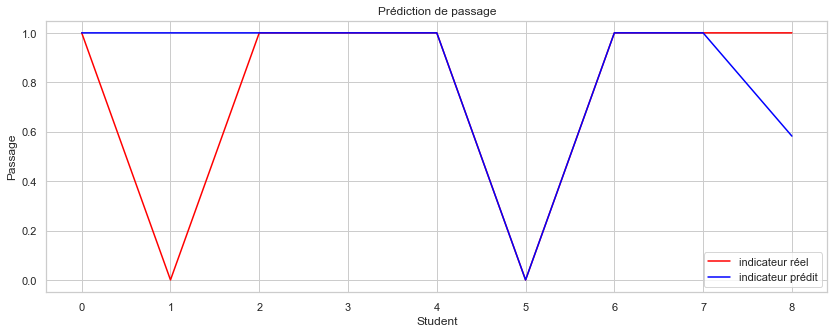

In [21]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'indicateur réel')
plt.plot(y_pred, color = 'blue', label = 'indicateur prédit')
plt.title('Prédiction de passage')
plt.xlabel('Student')
plt.ylabel('Passage')
plt.legend()
plt.show()